## EDA With Red Wine Data

In [8]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download latest version
kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009", path="D:\python\EDA\Data")

In [7]:
import zipfile
with zipfile.ZipFile("D:/python/EDA/Data/red_wine/red-wine-quality-cortez-et-al-2009.zip", 'r') as zipref:
    zipref.extractall("Data")


In [56]:
# Creating dataframe from extracted data
df = pd.read_csv("D:\python\EDA\Data\winequality-red.csv")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\susha\AppData\Local\Temp\ipykernel_7316\2351114198.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\python\EDA\Data\winequality-red.csv")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
#SUmmary of dataset
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
#Descriptive summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
df.shape

(1599, 12)

In [20]:
#Checking the missing value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
#Duplicate records
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [22]:
#Remove the duplicates
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(1359, 12)

In [26]:
#Correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: >

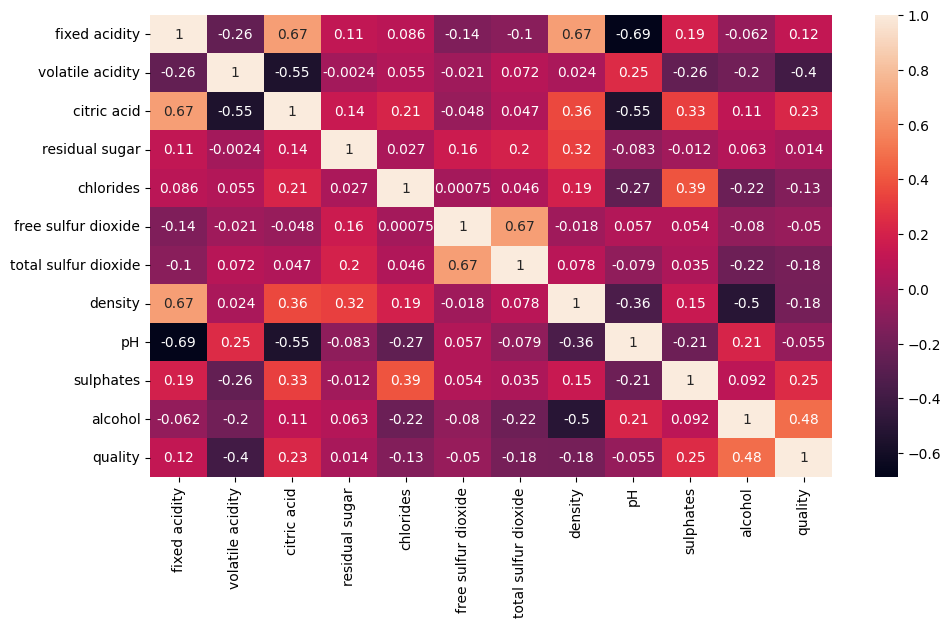

In [33]:
plt.figure(figsize=[11,6])
sns.heatmap(df.corr(), annot=True)

In [35]:
for i in df.columns:
    print(df[i].value_counts())

fixed acidity
7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
15.5     1
15.9     1
12.1     1
4.9      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity
0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
0.955     1
1.580     1
1.180     1
0.475     1
0.895     1
Name: count, Length: 143, dtype: int64
citric acid
0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.79      1
0.71      1
0.72      1
0.75      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
15.40      1
3.75       1
13.80      1
5.70       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides
0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.267     1
0.169     1
0.205     1
0.235     1
0.230     1
Name: count, Length: 153, dtype: int64
free sulfur dioxide
6.0     121
5.0      88
15.0     65
12.0     64
10.0     63


## Handling Imbalanced data

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [59]:
df['volatile acidity'].value_counts()

volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.580    38
         ..
1.005     1
0.955     1
1.580     1
1.180     1
0.895     1
Name: count, Length: 143, dtype: int64

<Axes: >

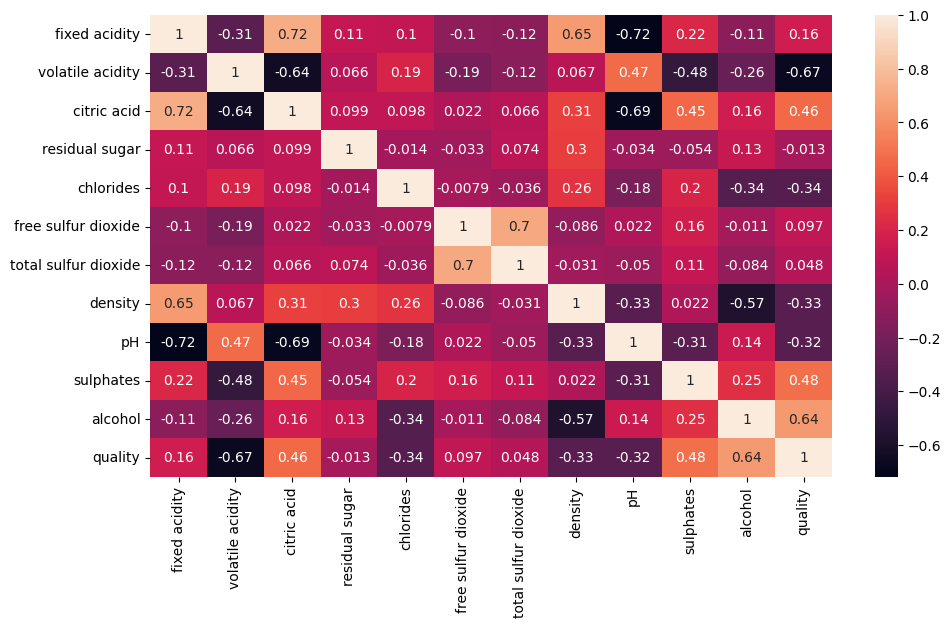

In [65]:
plt.figure(figsize=[11,6])
sns.heatmap(oversampled_df.corr(), annot=True)

<Axes: xlabel='quality', ylabel='alcohol'>

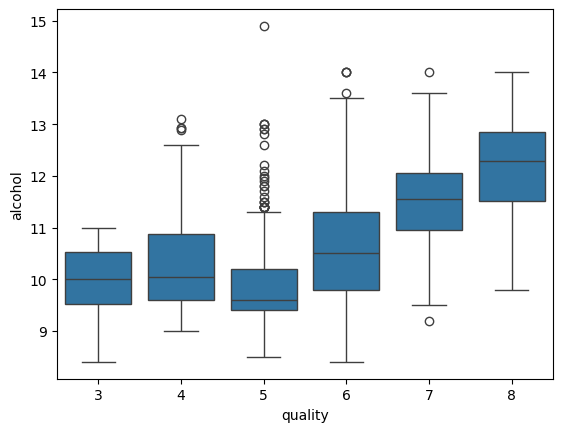

In [71]:
sns.boxplot(x = 'quality', y = 'alcohol', data=oversampled_df)

In [75]:
#Cleaning the outliers
minimum, Q1, median, Q3, maximum = np.quantile(oversampled_df['alcohol'], [0, 0.25, 0.50, 0.75, 1.0]).tolist()

In [76]:
IQR = Q3 - Q1
IQR

1.7862435260674214

In [78]:
lower_fence = Q1 - 1.5*(IQR)
higher_fence = Q3 + 1.5*(IQR)
lower_fence, higher_fence

(7.074435019399252, 14.219409123668939)

In [81]:
nn = oversampled_df[oversampled_df['alcohol'].between(lower_fence, higher_fence)].reset_index(drop=True)

In [83]:
nn.shape

(3461, 12)

In [84]:
oversampled_df.shape

(3462, 12)

<Axes: >

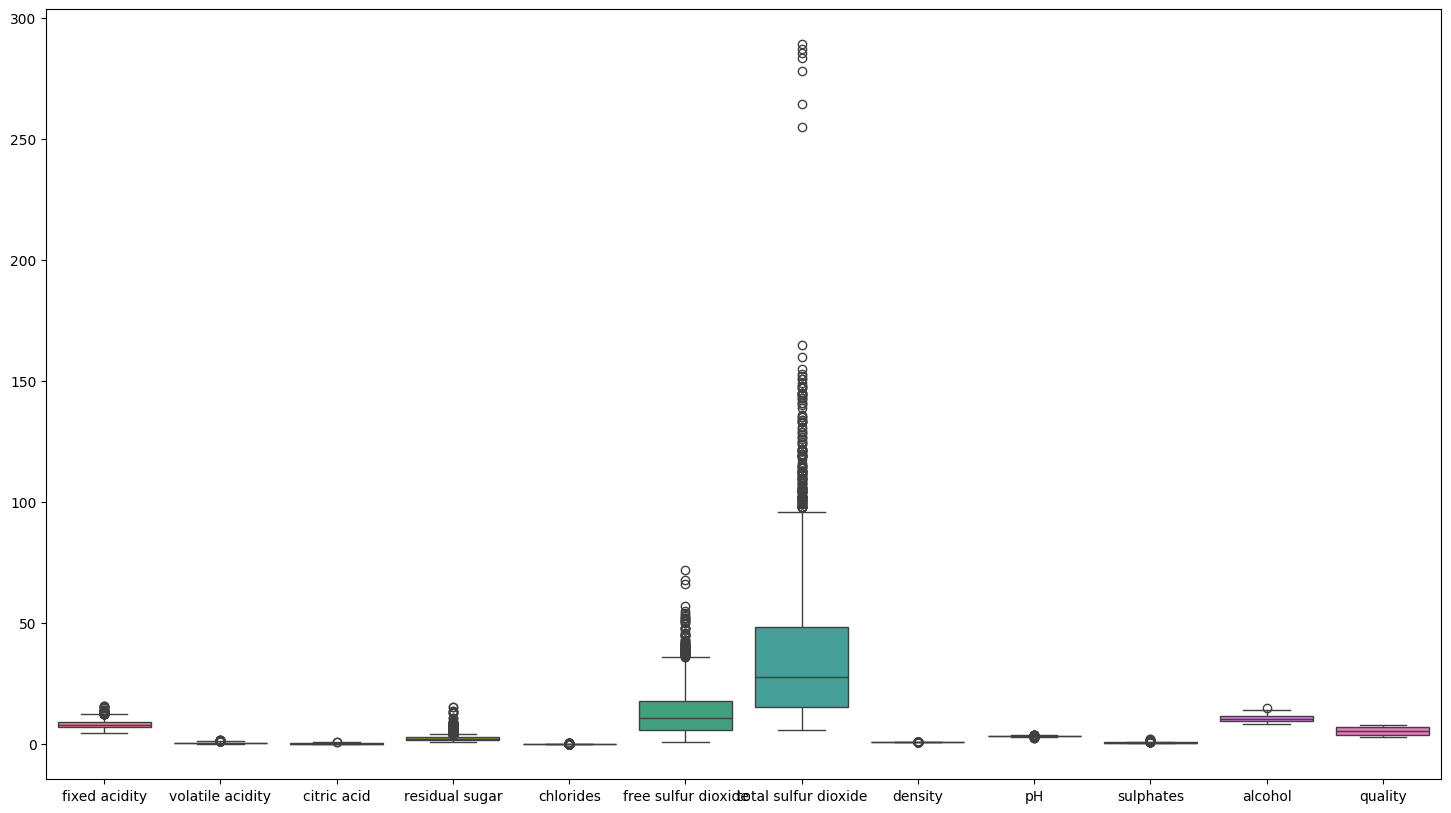

In [92]:
plt.figure(figsize=[18,10])
sns.boxplot(data=oversampled_df)

In [110]:


def iqr_outlier_filter(df):
    num_df = df.select_dtypes(include=np.number)
    Minimum = num_df.min()
    Q1 = num_df.quantile(0.25)
    Q3 = num_df.quantile(0.75)
    Maximum = num_df.max()
    IQR = Q3 - Q1

    mask = ~((num_df < (Q1 - 1.5 * IQR)) | 
             (num_df > (Q3 + 1.5 * IQR))).any(axis=1)

    return df[mask]


In [115]:
oversampled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


<Axes: ylabel='fixed acidity'>

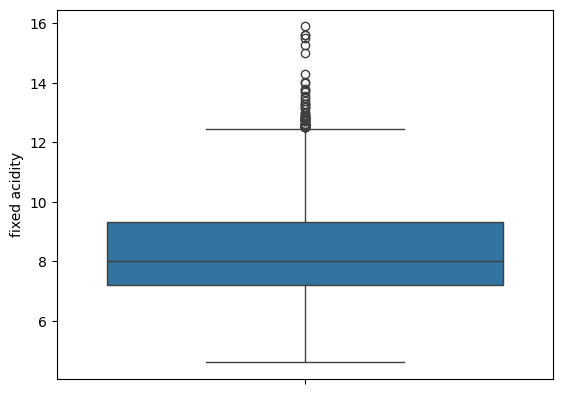

In [116]:
sns.boxplot(oversampled_df['fixed acidity'])

In [119]:
minimum, Q1, median, Q3, maximum = np.quantile(oversampled_df['fixed acidity'], [0, 0.25, 0.50, 0.75, 1.0]).tolist()

In [120]:
Q1, Q3

(7.2, 9.317719112001189)

In [122]:
IQR = Q3 - Q1
IQR

2.117719112001189

In [124]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

<Axes: ylabel='fixed acidity'>

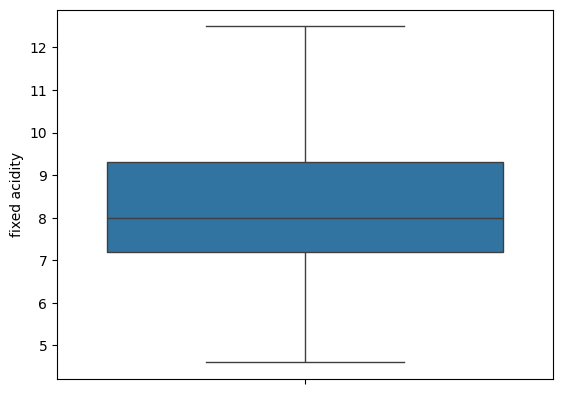

In [126]:
oversampled_df['fixed acidity'] = oversampled_df['fixed acidity'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['fixed acidity'])

<Axes: ylabel='volatile acidity'>

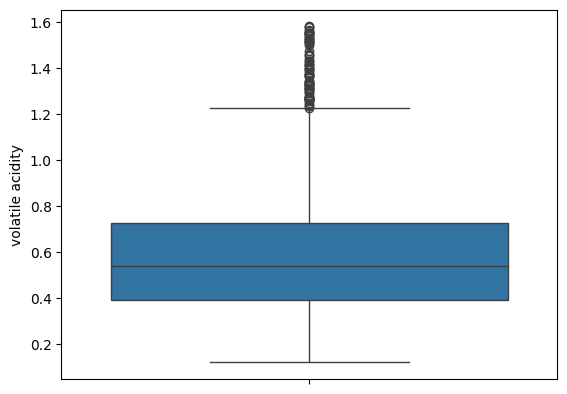

In [127]:
sns.boxplot(oversampled_df['volatile acidity'])

In [128]:
minimum, Q1, median, Q3, maximum = np.quantile(oversampled_df['volatile acidity'], [0, 0.25, 0.50, 0.75, 1.0]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

<Axes: ylabel='volatile acidity'>

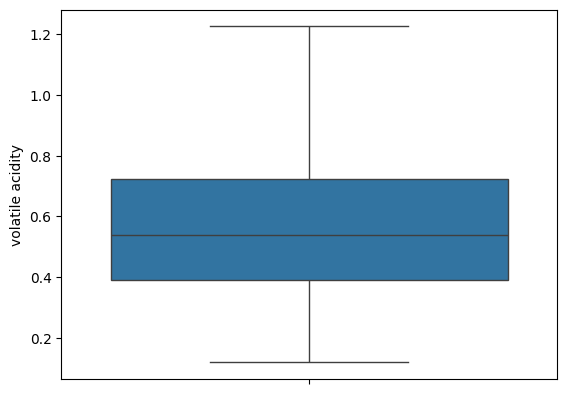

In [ ]:
oversampled_df['volatile acidity'] = oversampled_df['volatile acidity'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['volatile acidity'])

In [131]:
oversampled_df['volatile acidity'].shape

(3462,)

<Axes: ylabel='citric acid'>

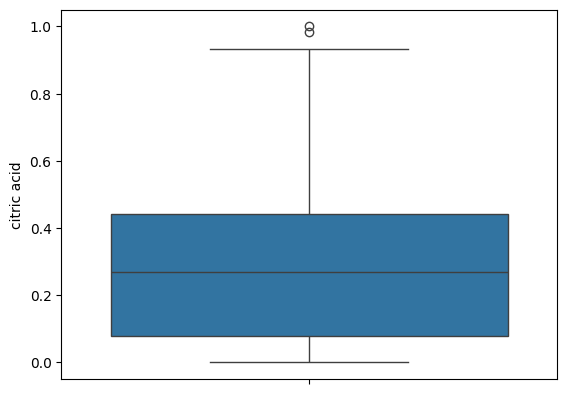

In [134]:
sns.boxplot(oversampled_df['citric acid'])

In [135]:
Q1, Q3 = np.quantile(oversampled_df['citric acid'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

<Axes: ylabel='citric acid'>

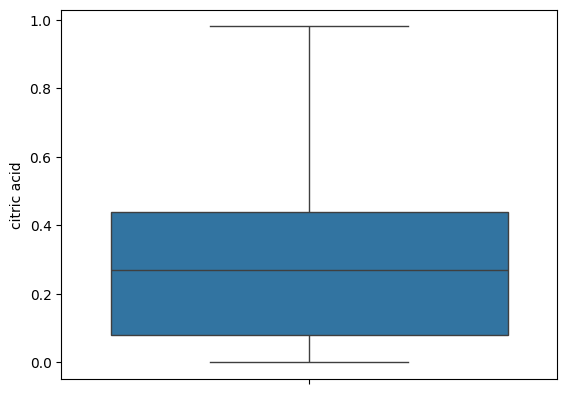

In [136]:
oversampled_df['citric acid'] = oversampled_df['citric acid'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['citric acid'])

<Axes: ylabel='free sulfur dioxide'>

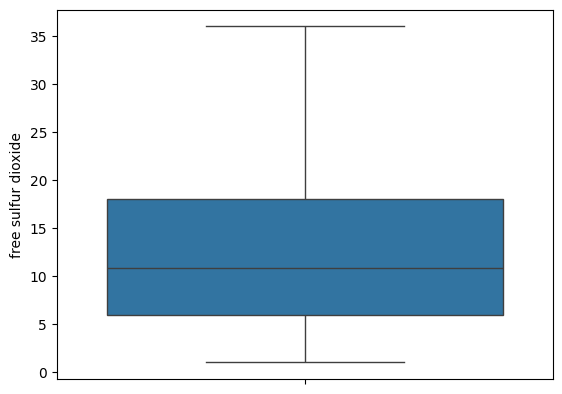

In [137]:
Q1, Q3 = np.quantile(oversampled_df['free sulfur dioxide'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
oversampled_df['free sulfur dioxide'] = oversampled_df['free sulfur dioxide'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['free sulfur dioxide'])

<Axes: ylabel='residual sugar'>

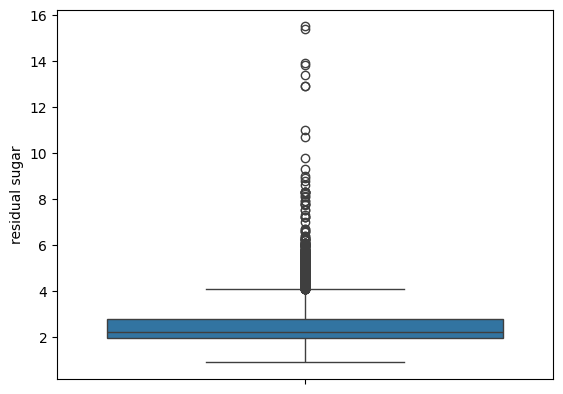

In [138]:
sns.boxplot(oversampled_df['residual sugar'])

<Axes: ylabel='residual sugar'>

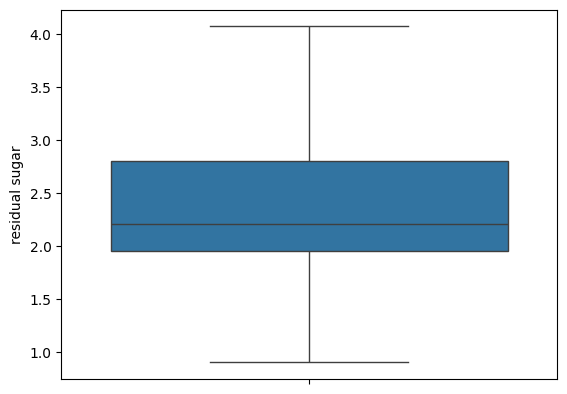

In [139]:
Q1, Q3 = np.quantile(oversampled_df['residual sugar'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
oversampled_df['residual sugar'] = oversampled_df['residual sugar'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['residual sugar'])

In [140]:
oversampled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


<Axes: ylabel='chlorides'>

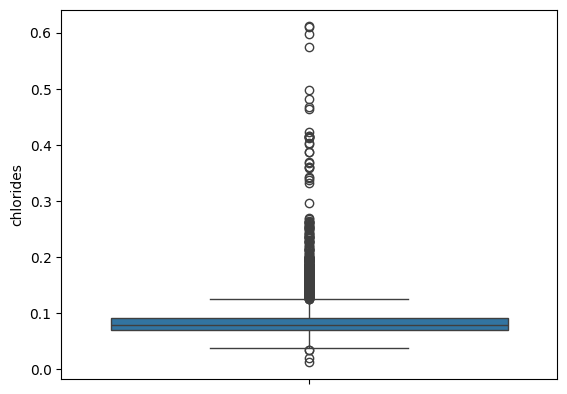

In [149]:
sns.boxplot(oversampled_df['chlorides'])

<Axes: ylabel='chlorides'>

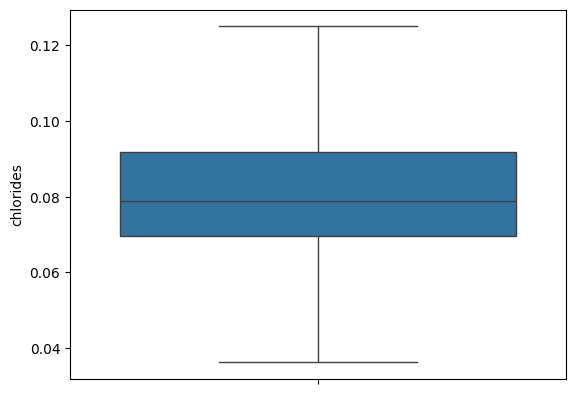

In [150]:
Q1, Q3 = np.quantile(oversampled_df['chlorides'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
oversampled_df['chlorides'] = oversampled_df['chlorides'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['chlorides'])

<Axes: ylabel='total sulfur dioxide'>

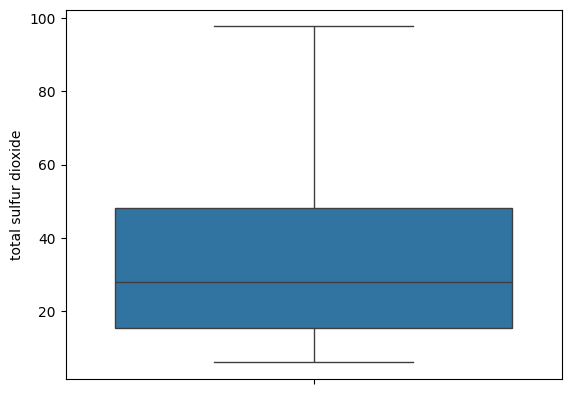

In [151]:
Q1, Q3 = np.quantile(oversampled_df['total sulfur dioxide'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
oversampled_df['total sulfur dioxide'] = oversampled_df['total sulfur dioxide'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['total sulfur dioxide'])

<Axes: >

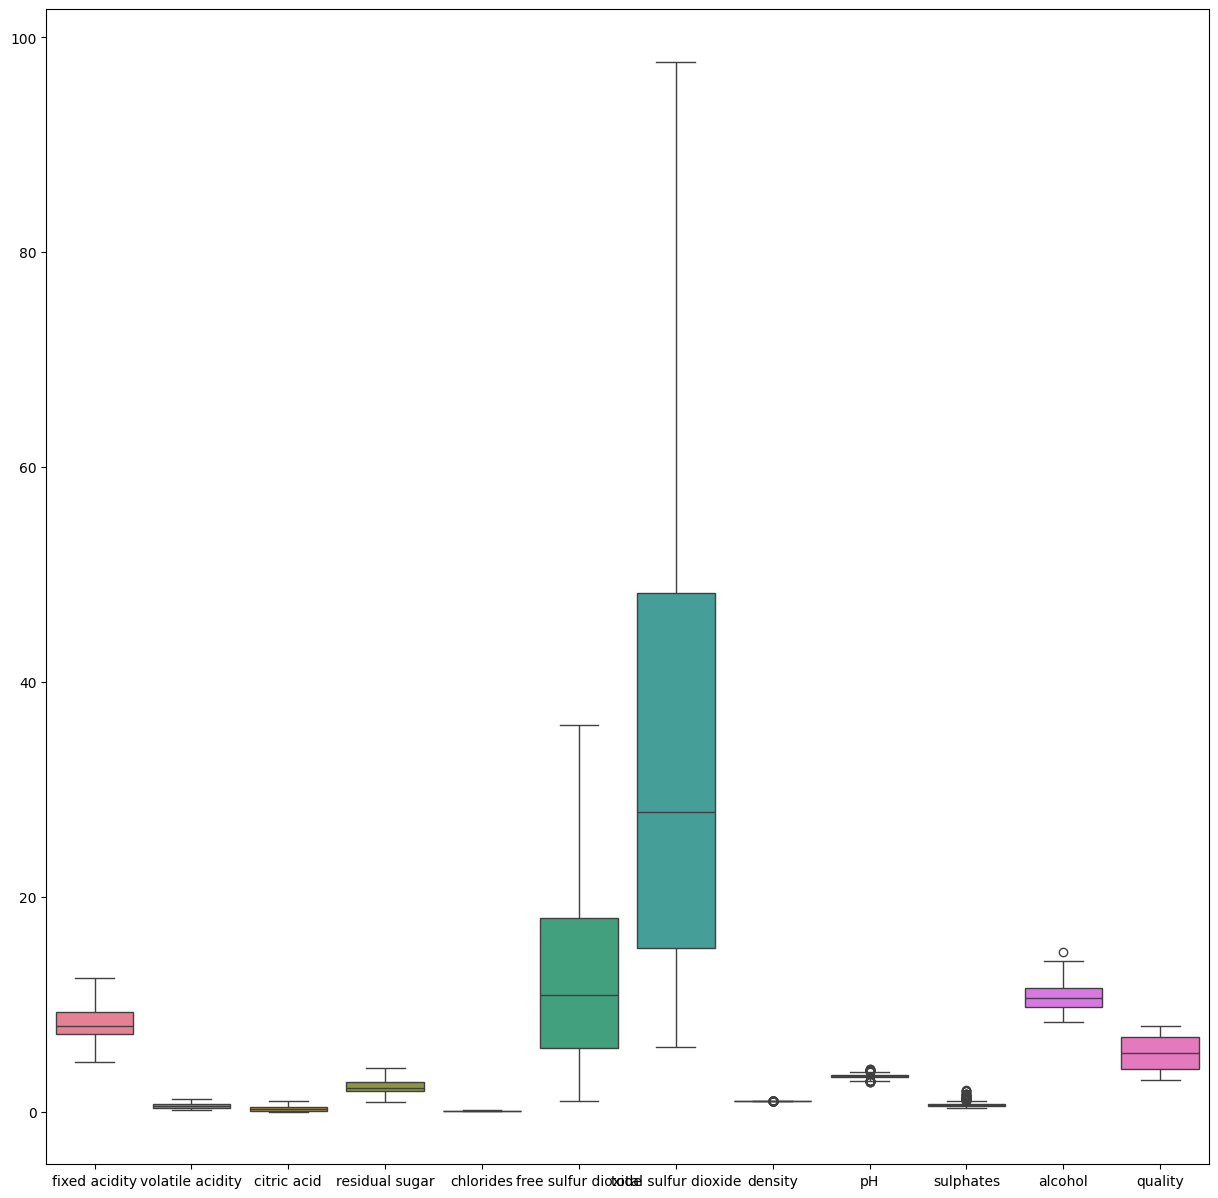

In [153]:
plt.figure(figsize=[15, 15])
sns.boxplot(oversampled_df)

<Axes: ylabel='density'>

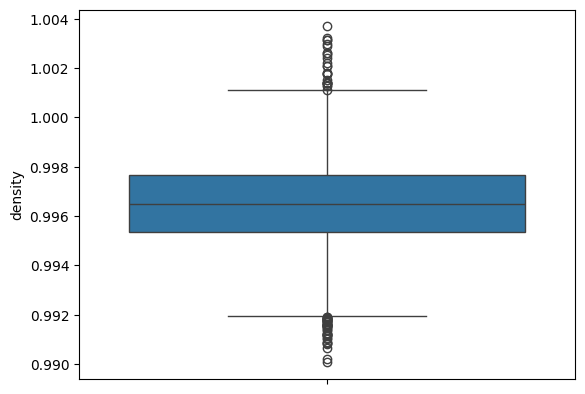

In [154]:
sns.boxplot(oversampled_df['density'])

<Axes: ylabel='density'>

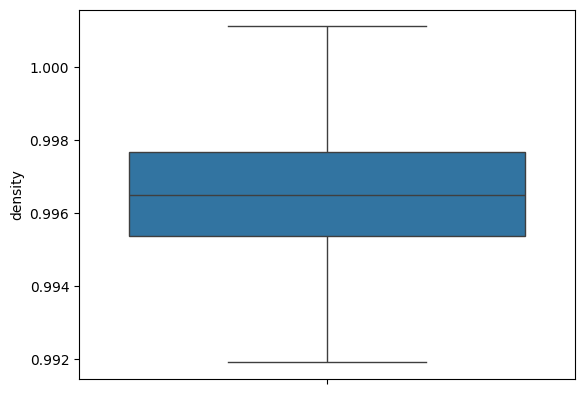

In [155]:
Q1, Q3 = np.quantile(oversampled_df['density'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
oversampled_df['density'] = oversampled_df['density'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['density'])

<Axes: ylabel='pH'>

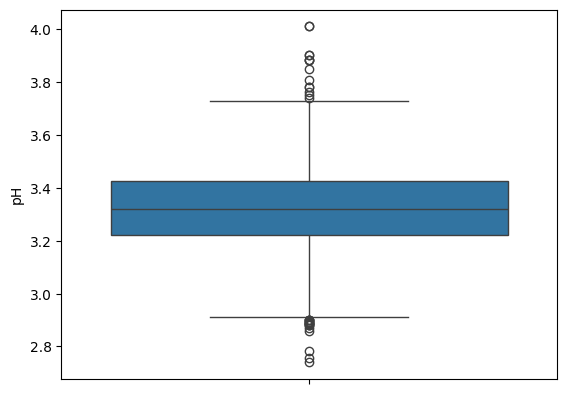

In [156]:
sns.boxplot(oversampled_df['pH'])

<Axes: ylabel='pH'>

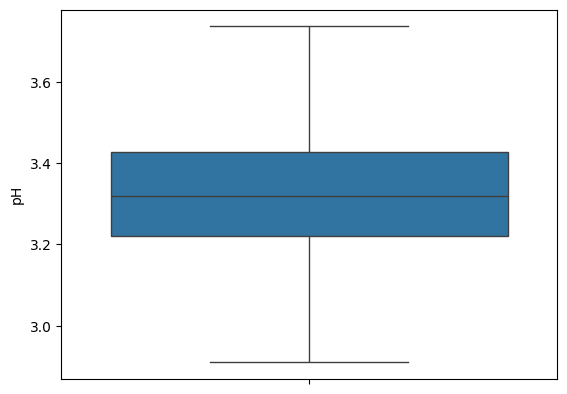

In [157]:
Q1, Q3 = np.quantile(oversampled_df['pH'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
oversampled_df['pH'] = oversampled_df['pH'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['pH'])

<Axes: ylabel='sulphates'>

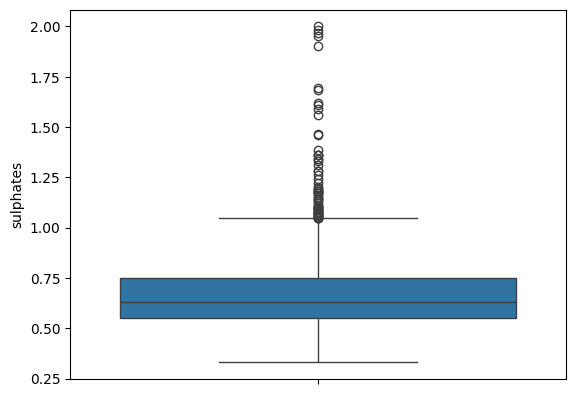

In [158]:
sns.boxplot(oversampled_df['sulphates'])

<Axes: ylabel='sulphates'>

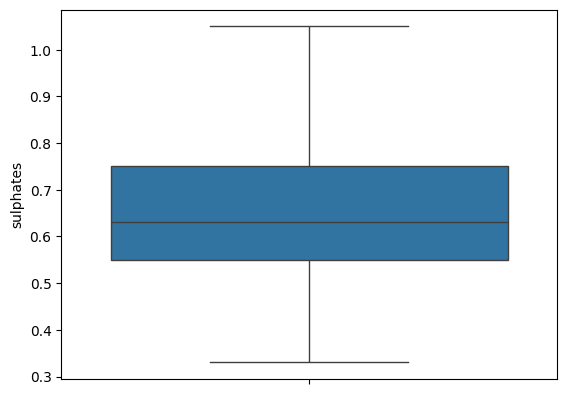

In [159]:
Q1, Q3 = np.quantile(oversampled_df['sulphates'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
oversampled_df['sulphates'] = oversampled_df['sulphates'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['sulphates'])

<Axes: ylabel='alcohol'>

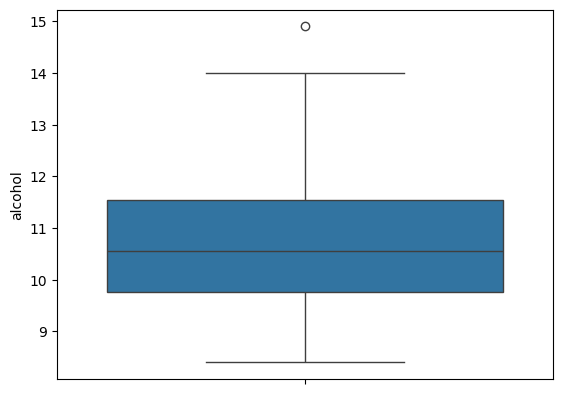

In [160]:
sns.boxplot(oversampled_df['alcohol'])

<Axes: ylabel='alcohol'>

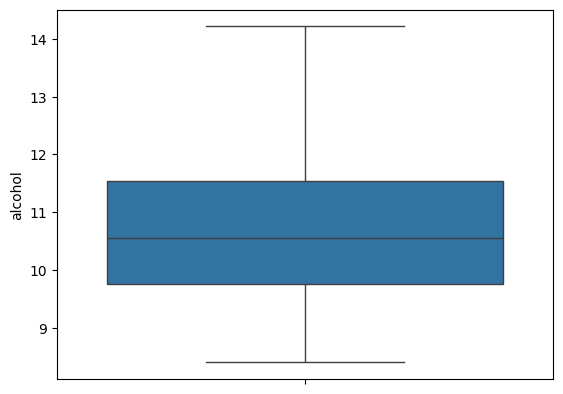

In [161]:
Q1, Q3 = np.quantile(oversampled_df['alcohol'], [0.25, 0.75]).tolist()
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
oversampled_df['alcohol'] = oversampled_df['alcohol'].clip(lower_bound, upper_bound)
sns.boxplot(oversampled_df['alcohol'])

In [168]:
oversampled_df['alcohol'].value_counts()
# lower_bound, upper_bound

alcohol
9.500000     112
9.400000      93
9.800000      65
9.200000      65
10.000000     63
            ... 
11.850155      1
13.206828      1
12.883323      1
13.261285      1
13.696562      1
Name: count, Length: 2093, dtype: int64

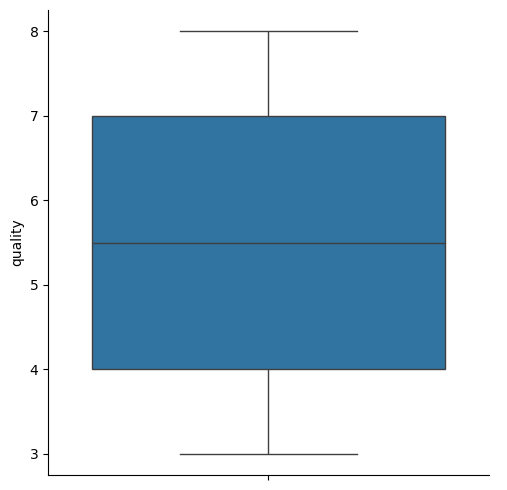

In [175]:
sns.catplot(y = 'quality', data = oversampled_df, kind = 'box')

In [171]:
oversampled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [179]:
oversampled_df[oversampled_df['alcohol'].between(lower_bound, upper_bound)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3457,11.859666,0.486541,0.691526,3.908462,0.079973,6.000000,23.305126,0.998757,3.073626,0.745967,11.850155,8
3458,6.903304,0.538811,0.066608,2.105066,0.056813,31.660793,61.374450,0.992856,3.475595,0.771189,13.206828,8
3459,8.372164,0.387495,0.489163,3.822195,0.079111,13.750154,34.500307,0.997508,3.331947,0.836392,12.883323,8
3460,11.126606,0.567982,0.631853,4.075655,0.083746,5.826606,17.959635,0.998592,3.221734,0.712541,13.261285,8


In [180]:
oversampled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3457,11.859666,0.486541,0.691526,3.908462,0.079973,6.000000,23.305126,0.998757,3.073626,0.745967,11.850155,8
3458,6.903304,0.538811,0.066608,2.105066,0.056813,31.660793,61.374450,0.992856,3.475595,0.771189,13.206828,8
3459,8.372164,0.387495,0.489163,3.822195,0.079111,13.750154,34.500307,0.997508,3.331947,0.836392,12.883323,8
3460,11.126606,0.567982,0.631853,4.075655,0.083746,5.826606,17.959635,0.998592,3.221734,0.712541,13.261285,8


<Axes: xlabel='alcohol', ylabel='Count'>

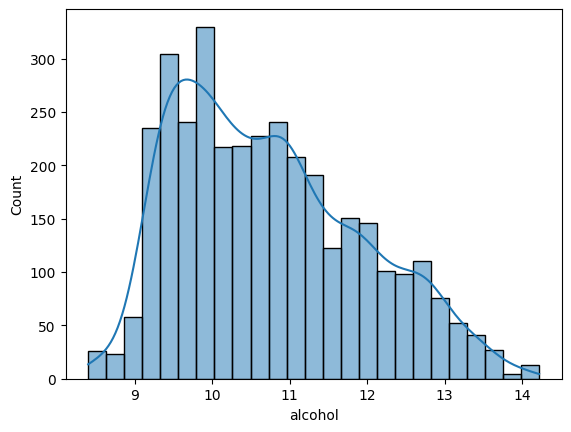

In [182]:
sns.histplot(oversampled_df['alcohol'], kde=True)